In [1]:
import pandas as pd

class Matches:
    def __init__(self, file_name: str) -> None:
        assert isinstance(file_name, str)
        self.file = pd.read_csv(file_name)

    def get_frame(self, cols: list) -> pd.DataFrame:
        assert isinstance(cols, list)
        if set(cols).issubset(self.file.columns):
            return pd.DataFrame(self.file, columns=cols)
        else:
            return -1


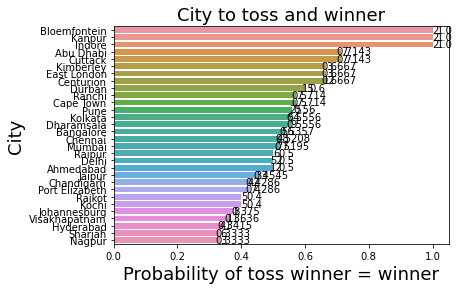

In [2]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
#from data_process import Matches


def city_toss_winner(city):

    assert isinstance(city, str)

    # load and select specific data
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['city', 'toss_winner', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing",inplace=True)

    # check input is valid or not
    cities = set(df['city'])
    if city not in cities:
        print("You enter a city not in our dataset, try again!")
        return -1

    city_df = df.loc[df['city'] == city]

    wr,cn,wn = calculate_wr(city_df=city_df)

    return wr,cn,wn

def calculate_wr(city_df):
    competition_num = len(city_df)
    win_num = 0
    for row in city_df.iterrows():
        if row[1]['winner'] == "missing":
            competition_num-=1
            continue
        if row[1]['toss_winner'] == row[1]['winner']:
            win_num += 1
    #print(win_num,competition_num)
    return round(win_num/competition_num,4), competition_num, win_num


def city_toss_winner_graph():
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['city', 'toss_winner', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing",inplace=True)
    
    cities = set(df['city'])

    city_wr_dict = {}
    
    for city in cities:
        if city == "missing" :
            continue
        
        if city not in city_wr_dict:
            #print(city)
            wr,cn,wn=calculate_wr(df.loc[df['city'] == city])
            city_wr_dict[city]=[wr,wn,cn]
    
    city_wr_frame = pd.DataFrame.from_dict(data=city_wr_dict,orient='index',columns=['win_rate','win','competition'])
    city_wr_frame.reset_index(inplace=True)
    city_wr_frame.rename(columns={'index': 'city'},inplace=True)
    city_wr_frame.sort_values(by="win_rate",inplace=True,ascending=False)
    pic=sns.barplot(data=city_wr_frame,x='win_rate',y='city',ci=None,hue_order=city_wr_frame["win_rate"])
    i=1
    for index,row in city_wr_frame.iterrows():
        pic.text(row['win_rate']+0.01,i-0.6,row['competition'],ha="center")
        pic.text(row['win_rate']+0.04,i-0.6,row['win_rate'],ha="center")
        i+=1
    pic.set_title('City to toss and winner',fontsize=18)
    pic.set_xlabel('Probability of toss winner = winner',fontsize=18)
    pic.set_ylabel('City',fontsize=18)
    plt.show()
    #print(city_wr_frame)


if __name__ == "__main__":
    #res = city_toss_winner("Bangalore")
    
    city_toss_winner_graph()


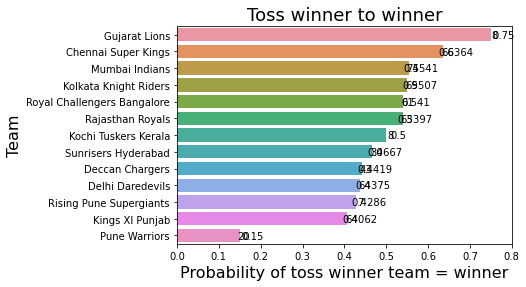

In [3]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
#from data_process import Matches


def team_toss_winner_graph():
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['toss_winner', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing",inplace=True)
    
    team_toss_dict={}
    
    for index,row in df.iterrows():
        if row['toss_winner'] not in team_toss_dict:
            team_toss_dict[row['toss_winner']]=[0,0,0] #toss_winner win, toss_winner, win rate
        
        if row['toss_winner']==row['winner']:
            team_toss_dict[row['toss_winner']][0]+=1
            team_toss_dict[row['toss_winner']][1]+=1
        else:
            team_toss_dict[row['toss_winner']][1]+=1
    
    for i in team_toss_dict.keys():
        team_toss_dict[i][2]=round(team_toss_dict[i][0]/team_toss_dict[i][1],4)
            
            
    team_toss_frame = pd.DataFrame.from_dict(data=team_toss_dict,orient='index',columns=['tosswinner_win','tosswinner','win_rate'])
    team_toss_frame.reset_index(inplace=True)
    team_toss_frame.rename(columns={'index': 'team'},inplace=True)
    team_toss_frame.sort_values(by="win_rate",inplace=True,ascending=False)
    pic=sns.barplot(data=team_toss_frame,x='win_rate',y='team',ci=None,hue_order=team_toss_frame["win_rate"])
    i=1
    for index,row in team_toss_frame.iterrows():
        pic.text(row['win_rate']+0.01,i-0.8,row['tosswinner'],ha="center")
        pic.text(row['win_rate']+0.03,i-0.8,row['win_rate'],ha="center")
        i+=1
    
    pic.set_title('Toss winner to winner',fontsize=18)
    pic.set_xlabel('Probability of toss winner team = winner',fontsize=16)
    pic.set_ylabel('Team',fontsize=16)
    pic.set_xlim(0,0.8) 
    plt.show()
    #print(team_toss_frame)
    
            
    

if __name__=="__main__":
    team_toss_winner_graph()

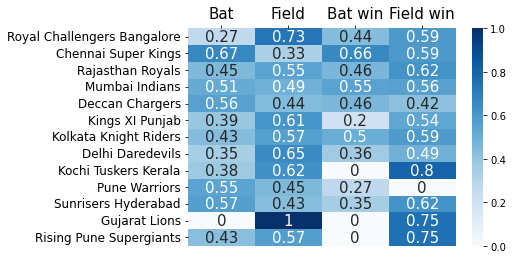

In [6]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
#from data_process import Matches


def toss_winner_choice_table():
    # preprocess
    matches = Matches(file_name="..\data\matches.csv")
    cols = ['toss_winner', 'toss_decision', 'winner']
    df = matches.get_frame(cols=cols)
    df.fillna("missing", inplace=True)

    team_choice_dict = {}

    # calculate necessary data
    for index, row in df.iterrows():
        if row['winner'] == "missing":
            continue

        if row['toss_winner'] not in team_choice_dict:
            team_choice_dict[row['toss_winner']] = [0, 0, 0, 0, 0]

        team_choice_dict[row['toss_winner']][4] += 1

        choice = row['toss_decision']
        #print(choice)
        if choice == "bat":
            team_choice_dict[row['toss_winner']][0] += 1
            if row['toss_winner'] == row['winner']:
                team_choice_dict[row['toss_winner']][2] += 1

        elif choice == "field":
            team_choice_dict[row['toss_winner']][1] += 1
            if row['toss_winner'] == row['winner']:
                team_choice_dict[row['toss_winner']][3] += 1

    for k in team_choice_dict.keys():
        data_list = team_choice_dict[k]
        if data_list[0] != 0:
            data_list[2] = round(data_list[2]/data_list[0], 4)
            data_list[0] = round(data_list[0]/data_list[4], 4)

        if data_list[1] != 0:
            data_list[3] = round(data_list[3]/data_list[1], 4)
            data_list[1] = round(data_list[1]/data_list[4], 4)

    # draw the graph
    team_choice_frame = pd.DataFrame.from_dict(data=team_choice_dict, orient='index', columns=[
        'toss_decision_bat', 'toss_decision_field', 'choose_bat_win', 'choose_field_win', 'toss_win_num'])

    team_choice_frame = pd.DataFrame(team_choice_frame, columns=[
                                     'toss_decision_bat', 'toss_decision_field', 'choose_bat_win', 'choose_field_win'])

    pic = sns.heatmap(team_choice_frame, annot=True, xticklabels=[
                      "Bat", "Field", "Bat win", "Field win"], cmap="Blues", annot_kws={"fontsize": 15})
    pic.xaxis.tick_top()
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=12)
    plt.show()


if __name__ == "__main__":
    toss_winner_choice_table()
